### Simple Linear Regression Model with Basic Machine Learning Concepts


**Step 1:
Importing all the necessary libraries for plotting and working with dataframes**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

**Opening the dataset that I downloaded from Kaggle.com 
https://www.kaggle.com/datasets/truecue/worldsustainabilitydataset**


In [2]:
dataset = pd.read_csv("/Users/kristinaserova/Desktop/Final Project for Python class /WorldSustainabilityDataset.csv")

### Data Observation

In [3]:
dataset.keys()
# checking the name of the columns in the dataset

Index(['Country Name', 'Country Code', 'Year',
       'Access to electricity (% of population) - EG.ELC.ACCS.ZS',
       'Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG',
       'Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS',
       'Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS',
       'Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS',
       'Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS',
       'Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS',
       'Automated teller machines (ATMs) (per 100,000 adults) - FB.ATM.TOTL.P5',
       'Broad money (% of GDP) - FM.LBL.BMNY.GD.ZS',
       'Children out of school (% of primary school age) - SE.PRM.UNER.ZS',
       'Compulsory education, duration (years) - SE.COM.DURS',
       'Cost of business start-up procedures, female (% of GNI per capita) - IC.REG.CO

In [4]:
dataset.head()
# giving me the sense how the dataset looks like 

,Country Name,Country Code,Year,Access to electricity (% of population) - EG.ELC.ACCS.ZS,Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG,"Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS",Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS,Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS,Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS,Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS,...,Gini index (World Bank estimate) - SI.POV.GINI,Income Classification (World Bank Definition),Individuals using the Internet (% of population) - IT.NET.USER.ZS,"Life expectancy at birth, total (years) - SP.DYN.LE00.IN","Population, total - SP.POP.TOTL",Regime Type (RoW Measure Definition),Rural population (% of total population) - SP.RUR.TOTL.ZS,Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS,Urban population (% of total population) - SP.URB.TOTL.IN.ZS,World Regions (UN SDG Definition)
0,Aruba,ABW,2000,91.660398,NaN,15.392211,2.389134,0.000190,0.000190,NaN,...,NaN,High income,NaN,NaN,NaN,NaN,53.283,NaN,NaN,Latin America and Caribbean
1,Aruba,ABW,2001,100.000000,NaN,11.491930,2.509046,0.000214,0.000214,NaN,...,NaN,High income,17.1,73.853,92892.0,NaN,53.661,0.000712,46.339,Latin America and Caribbean
2,Aruba,ABW,2002,100.000000,NaN,3.893620,2.721385,0.000223,0.000223,NaN,...,NaN,High income,18.8,73.937,94992.0,NaN,54.028,0.000657,45.972,Latin America and Caribbean
3,Aruba,ABW,2003,100.000000,NaN,6.713863,2.733676,0.000243,0.000243,NaN,...,NaN,High income,20.8,74.038,97016.0,NaN,54.394,0.000700,45.606,Latin America and Caribbean
4,Aruba,ABW,2004,100.000000,NaN,9.801576,2.678363,0.000256,0.000256,NaN,...,NaN,High income,23.0,74.156,98744.0,NaN,54.760,0.000685,45.240,Latin America and Caribbean


In [5]:
dataset.dropna(axis=0)
# data cleaning process has started
# good to know!
# axis=0 means to drop rows that have missing values 
# axis=1 means drop columns that have missing values 

,Country Name,Country Code,Year,Access to electricity (% of population) - EG.ELC.ACCS.ZS,Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG,"Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS",Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS,Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS,Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS,Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS,...,Gini index (World Bank estimate) - SI.POV.GINI,Income Classification (World Bank Definition),Individuals using the Internet (% of population) - IT.NET.USER.ZS,"Life expectancy at birth, total (years) - SP.DYN.LE00.IN","Population, total - SP.POP.TOTL",Regime Type (RoW Measure Definition),Rural population (% of total population) - SP.RUR.TOTL.ZS,Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS,Urban population (% of total population) - SP.URB.TOTL.IN.ZS,World Regions (UN SDG Definition)
50,Albania,ALB,2012,99.900000,-0.705350,4.896755,1.249520,1.909274,0.067813,0.284006,...,29.0,Upper-middle income,49.400000,77.252000,2900401.0,Electoral Democracy,45.670,3.377277,54.330,Europe and Northern America
52,Albania,ALB,2014,99.950000,0.893149,0.876869,1.383816,1.991888,0.052012,0.255055,...,34.6,Upper-middle income,54.300000,77.813000,2889104.0,Electoral Democracy,43.577,3.075782,56.423,Europe and Northern America
53,Albania,ALB,2015,99.980000,0.380863,0.213407,1.394173,0.991069,0.053112,0.254302,...,32.9,Upper-middle income,56.900000,78.025000,2880703.0,Electoral Democracy,42.566,1.621620,57.434,Europe and Northern America
239,Benin,BEN,2011,36.900000,1.838182,-0.494067,1.412387,1.952643,1.949704,2.826080,...,43.4,Low income,4.148323,59.590000,9460829.0,Electoral Democracy,56.392,3.478769,43.608,Sub-Saharan Africa
292,Bulgaria,BGR,2007,100.000000,3.775733,-4.622715,3.262719,0.762548,0.000000,0.335281,...,36.1,Upper-middle income,33.640000,72.663415,7545338.0,Electoral Democracy,28.722,1.707308,71.278,Europe and Northern America
293,Bulgaria,BGR,2008,100.000000,12.084467,3.336836,2.621661,0.747185,0.000000,0.325298,...,33.6,Upper-middle income,39.670000,72.963415,7492561.0,Electoral Democracy,28.378,1.961671,71.622,Europe and Northern America
294,Bulgaria,BGR,2009,100.000000,-0.252902,7.291062,2.338428,0.232090,0.000000,0.322993,...,33.8,Upper-middle income,45.000000,73.412195,7444443.0,Electoral Democracy,28.037,0.707920,71.963,Europe and Northern America
295,Bulgaria,BGR,2010,100.000000,0.980637,7.260792,2.553241,0.675559,0.000000,0.303708,...,35.7,Upper-middle income,46.230000,73.512195,7395599.0,Electoral Democracy,27.698,1.704422,72.302,Europe and Northern America
296,Bulgaria,BGR,2011,100.000000,4.730956,8.865691,2.646284,0.941428,0.000000,0.291925,...,34.3,Upper-middle income,47.979993,74.163415,7348328.0,Electoral Democracy,27.362,2.188475,72.638,Europe and Northern America
297,Bulgaria,BGR,2012,100.000000,2.384723,8.967174,2.613500,0.766541,0.000000,0.278475,...,36.0,Upper-middle income,51.899988,74.314634,7305888.0,Electoral Democracy,27.025,1.646027,72.975,Europe and Northern America


In [6]:
dataset.describe()
# descriptive statistics about all the columns available in the dataset

,Year,Access to electricity (% of population) - EG.ELC.ACCS.ZS,Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG,"Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS",Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS,Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS,Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS,Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS,"Automated teller machines (ATMs) (per 100,000 adults) - FB.ATM.TOTL.P5",Broad money (% of GDP) - FM.LBL.BMNY.GD.ZS,...,"Unemployment rate, male (%) - SL_TLF_UEM - 8.5.2","Unemployment rate, women (%) - SL_TLF_UEM - 8.5.2","Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes",Gini index (World Bank estimate) - SI.POV.GINI,Individuals using the Internet (% of population) - IT.NET.USER.ZS,"Life expectancy at birth, total (years) - SP.DYN.LE00.IN","Population, total - SP.POP.TOTL",Rural population (% of total population) - SP.RUR.TOTL.ZS,Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS,Urban population (% of total population) - SP.URB.TOTL.IN.ZS
count,3287.000000,3193.000000,2566.000000,2628.000000,3220.000000,3094.000000,3111.000000,3099.000000,2285.000000,2777.000000,...,1807.000000,1806.000000,3285.000000,1303.000000,2986.000000,3096.000000,3.106000e+03,3278.000000,3053.000000,3106.000000
mean,2009.000000,79.300662,2.499857,8.870028,1.742674,3.812051,0.692833,0.880541,45.391741,57.034297,...,7.987327,9.810687,174.646907,37.512203,33.117667,70.160098,3.891506e+07,42.890186,7.015880,57.264100
std,5.478059,30.398748,18.752649,12.277347,1.957442,6.958003,2.657800,1.084312,45.915444,43.806176,...,5.781539,7.159265,757.653194,8.595502,29.386654,9.205632,1.413757e+08,22.705962,10.730922,22.687638
min,2000.000000,1.270180,-645.655290,-97.524776,0.090292,0.000000,0.000000,0.009500,0.000000,2.857408,...,0.100000,0.200000,0.048000,23.700000,0.000000,40.369000,6.967100e+04,0.000000,0.000000,8.461000
25%,2004.000000,62.900000,-0.246761,3.339159,0.741310,0.078542,0.000000,0.149597,9.558670,27.222821,...,4.100000,4.725000,2.426000,30.900000,6.000000,65.109000,2.406866e+06,24.816500,0.385851,39.546750
50%,2009.000000,98.653969,2.545392,8.752619,1.145867,0.878741,0.000000,0.388686,34.951665,47.054379,...,6.400000,7.500000,12.621000,35.600000,25.000000,72.564634,8.368371e+06,42.648000,2.122046,57.450000
75%,2014.000000,100.000000,5.545831,15.290790,2.056927,4.656705,0.097040,1.286091,62.252217,72.465711,...,10.000000,12.800000,72.012000,42.800000,58.000000,76.572750,2.605396e+07,60.732750,8.878282,75.372500
max,2018.000000,100.000000,229.493078,45.354086,27.101473,71.290764,40.772569,6.542877,324.172288,396.185604,...,37.000000,42.800000,9956.569000,64.800000,99.652849,84.934146,1.392730e+09,91.754000,81.949962,100.000000


In [7]:
subset = dataset.iloc[:,[0,2,43,19,29,42,50,52,40,41]]
# creating a subset based on the data I need for the analysis 

In [8]:
subset

,Country Name,Year,Continent,GDP per capita (current US$) - NY.GDP.PCAP.CD,Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS,"Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes",Rural population (% of total population) - SP.RUR.TOTL.ZS,Urban population (% of total population) - SP.URB.TOTL.IN.ZS,"Unemployment rate, male (%) - SL_TLF_UEM - 8.5.2","Unemployment rate, women (%) - SL_TLF_UEM - 8.5.2"
0,Aruba,2000,North America,20617.750470,0.175300,2.378,53.283,NaN,NaN,NaN
1,Aruba,2001,North America,20670.367010,0.180500,2.407,53.661,46.339,NaN,NaN
2,Aruba,2002,North America,20436.887130,0.181400,2.437,54.028,45.972,NaN,NaN
3,Aruba,2003,North America,20833.976360,0.184600,2.561,54.394,45.606,NaN,NaN
4,Aruba,2004,North America,22568.374990,0.187100,2.616,54.760,45.240,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3282,Zimbabwe,2014,Africa,1434.896277,80.775002,11.973,67.496,32.504,4.4,5.2
3283,Zimbabwe,2015,Africa,1445.069702,81.427200,12.170,67.615,32.385,NaN,NaN
3284,Zimbabwe,2016,Africa,1464.588957,82.792603,10.815,67.704,32.296,NaN,NaN
3285,Zimbabwe,2017,Africa,1335.665064,83.492996,10.247,67.763,32.237,NaN,NaN


In [9]:
subset_new = subset[(subset["Country Name"] == 'United States')]
# subsetting the dataset only to the US data

In [10]:
subset_new.dropna(axis=0, subset=None, inplace=False)
# data cleaning

,Country Name,Year,Continent,GDP per capita (current US$) - NY.GDP.PCAP.CD,Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS,"Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes",Rural population (% of total population) - SP.RUR.TOTL.ZS,Urban population (% of total population) - SP.URB.TOTL.IN.ZS,"Unemployment rate, male (%) - SL_TLF_UEM - 8.5.2","Unemployment rate, women (%) - SL_TLF_UEM - 8.5.2"
3117,United States,2001,North America,37133.24281,4.6787,5900.437,20.766,79.234,4.8,4.7
3118,United States,2002,North America,38023.16111,4.8408,5942.652,20.591,79.409,5.9,5.6
3119,United States,2003,North America,39496.48588,5.3263,5991.960,20.417,79.583,6.3,5.7
3120,United States,2004,North America,41712.80107,5.4777,6107.618,20.243,79.757,5.6,5.4
3121,United States,2005,North America,44114.74778,5.8412,6131.893,20.072,79.928,5.1,5.1
3122,United States,2006,North America,46298.73144,6.3967,6051.051,19.901,80.099,4.6,4.6
3123,United States,2007,North America,47975.96770,6.3042,6128.430,19.731,80.269,4.7,4.5
3124,United States,2008,North America,48382.55845,6.8456,5930.540,19.562,80.438,6.1,5.4
3125,United States,2009,North America,47099.98047,7.3544,5491.036,19.394,80.606,10.3,8.1
3126,United States,2010,North America,48466.65760,7.4357,5698.056,19.228,80.772,10.5,8.6


In [11]:
subset_new.describe()
# getting the desciptive stats about the US

,Year,GDP per capita (current US$) - NY.GDP.PCAP.CD,Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS,"Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes",Rural population (% of total population) - SP.RUR.TOTL.ZS,Urban population (% of total population) - SP.URB.TOTL.IN.ZS,"Unemployment rate, male (%) - SL_TLF_UEM - 8.5.2","Unemployment rate, women (%) - SL_TLF_UEM - 8.5.2"
count,19.000000,19.000000,19.000000,19.000000,19.000000,18.000000,19.000000,19.000000
mean,2009.000000,48565.268606,7.360189,5724.396947,19.376632,80.710389,6.210526,5.763158
std,5.627314,7900.430255,1.828242,309.514406,0.986904,0.937513,2.050175,1.532685
min,2000.000000,36334.908780,4.678700,5253.606000,17.744000,79.234000,3.900000,3.800000
25%,2004.500000,42913.774425,5.659450,5457.959000,18.609000,79.970750,4.750000,4.650000
50%,2009.000000,48382.558450,7.354400,5698.056000,19.394000,80.689000,5.600000,5.400000
75%,2013.500000,54078.262550,9.058600,5995.015000,20.157500,81.437000,6.950000,6.600000
max,2018.000000,63064.418410,10.107200,6131.893000,20.943000,82.256000,10.500000,8.600000


### The Goal of the Project
- create some plots using the dataset;
- predict the percentage of renewable energy consumption
using some of the Machine Learning concepts.

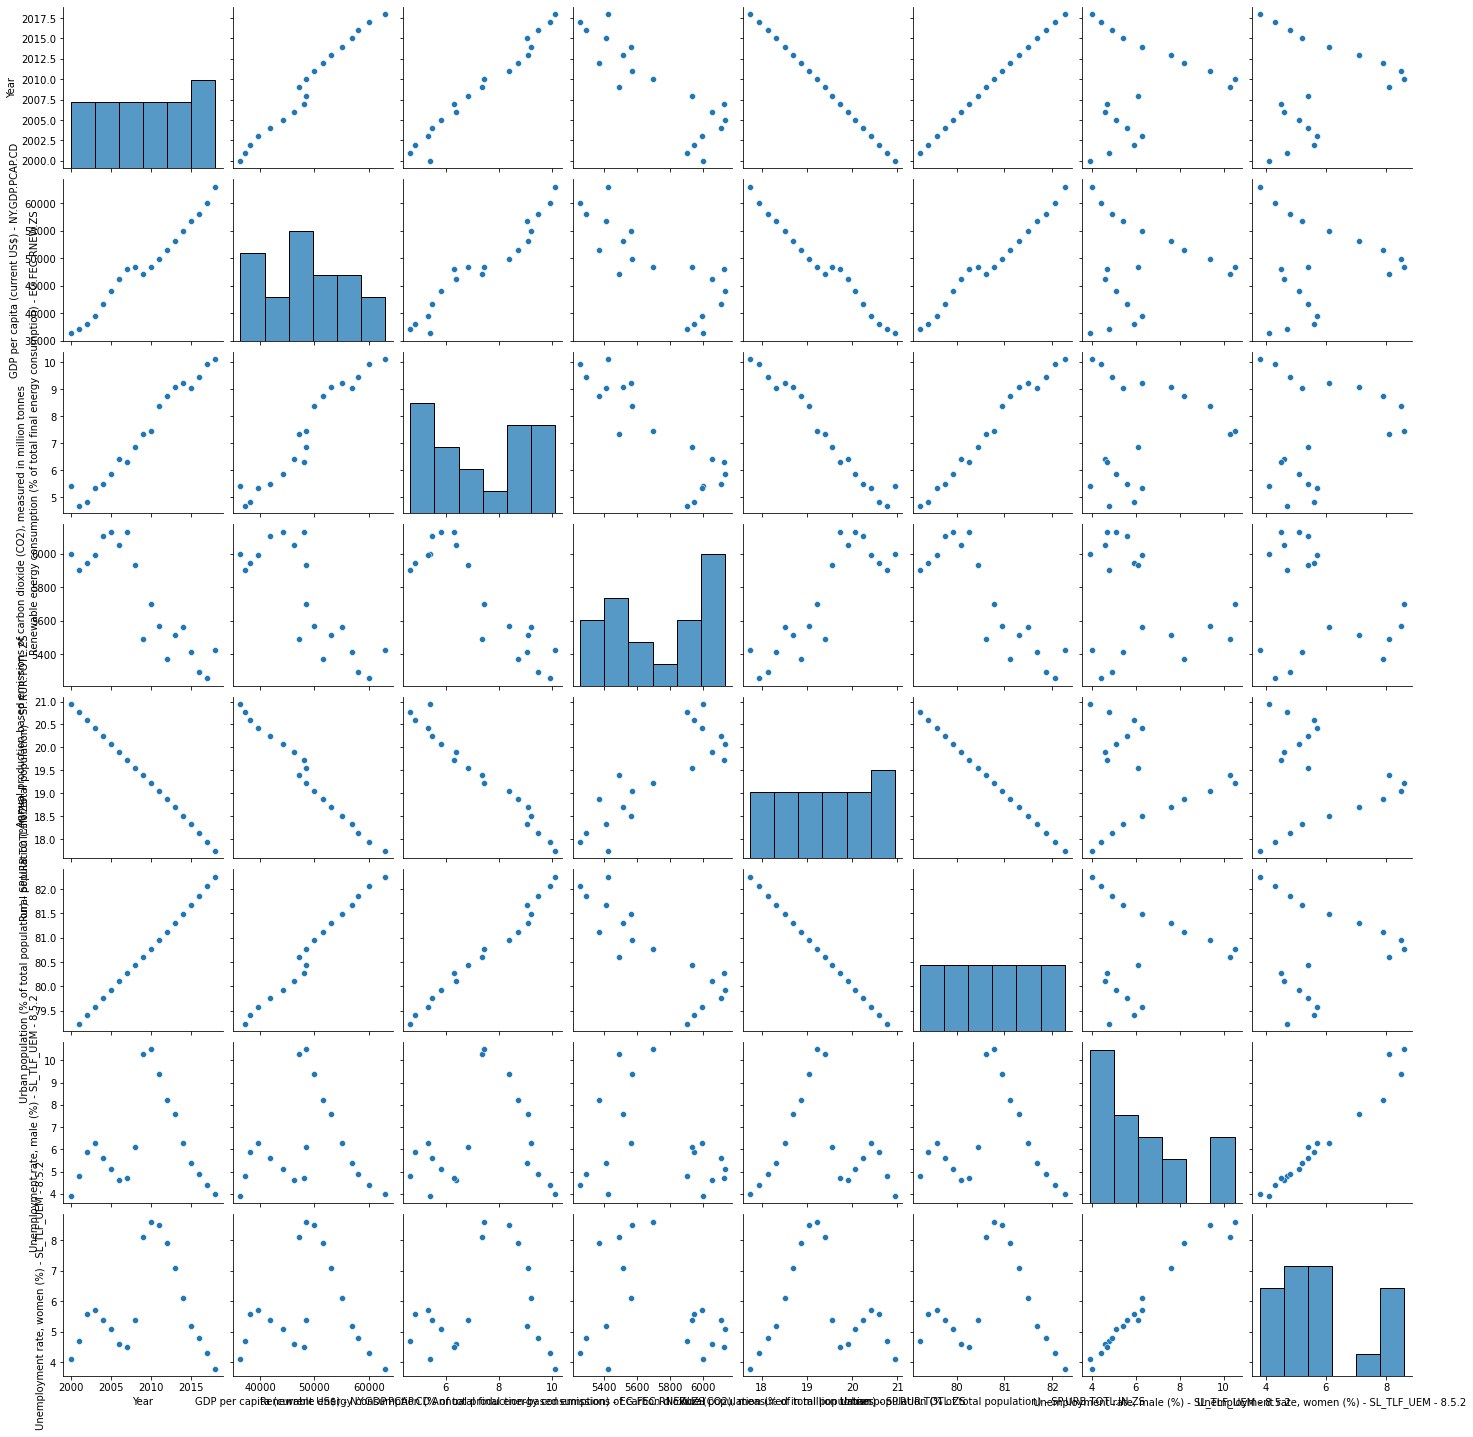

In [12]:
sns.pairplot(subset_new)
# observing some plots to choose the variables to work on

<AxesSubplot:xlabel='Rural population (% of total population) - SP.RUR.TOTL.ZS', ylabel='Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS'>

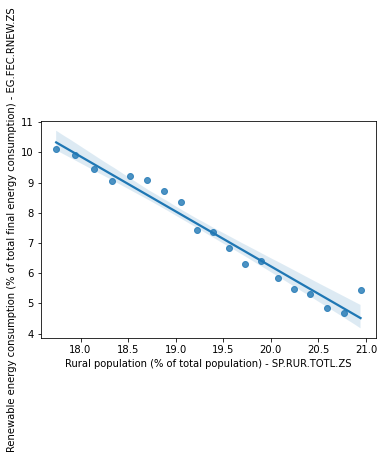

In [13]:
sns.regplot(data = subset_new, 
            y = 'Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS', x = 'Rural population (% of total population) - SP.RUR.TOTL.ZS')

<AxesSubplot:xlabel='GDP per capita (current US$) - NY.GDP.PCAP.CD', ylabel='Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS'>

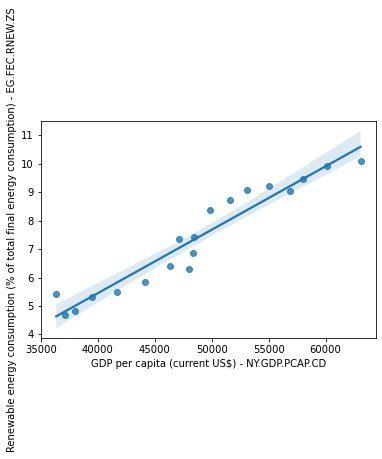

In [14]:
sns.regplot(data = subset_new, 
            y = 'Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS', x = 'GDP per capita (current US$) - NY.GDP.PCAP.CD')

In [15]:
# Creating a Machine Learning model, subsetting the data to two variables 
X = subset_new.iloc[:, 3:4].values
y = subset_new.iloc[:, 4:5].values

In [16]:
X #independent variable - GDP per capita

array([[36334.90878],
       [37133.24281],
       [38023.16111],
       [39496.48588],
       [41712.80107],
       [44114.74778],
       [46298.73144],
       [47975.9677 ],
       [48382.55845],
       [47099.98047],
       [48466.6576 ],
       [49882.55813],
       [51602.93105],
       [53106.53677],
       [55049.98833],
       [56863.3715 ],
       [58021.4005 ],
       [60109.65573],
       [63064.41841]])

In [17]:
y #dependent variable - % of renewable energy consumption

array([[ 5.4296999 ],
       [ 4.67869997],
       [ 4.84079981],
       [ 5.32630014],
       [ 5.47770023],
       [ 5.84119988],
       [ 6.39669991],
       [ 6.30420017],
       [ 6.84560013],
       [ 7.35440016],
       [ 7.43569994],
       [ 8.36419964],
       [ 8.72809982],
       [ 9.08329964],
       [ 9.22049999],
       [ 9.03390026],
       [ 9.45629978],
       [ 9.91909981],
       [10.10719967]])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3)
# importing the model from ML library, dividing the datasets into two sets - training set and test set
# test_size = 1/3 means that 33% of the data is the test set, 66% is the training set

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) # the method used to train a regression model on training dataset

LinearRegression()

In [20]:
y_pred = regressor.predict(X_test) #using the predict method - the built-in function in the library 
#y_test contains the real % of the renewable energy usage
#y_pred containes the predicted % of the renewable energy usage 

**Visualizing Training Set Results** 

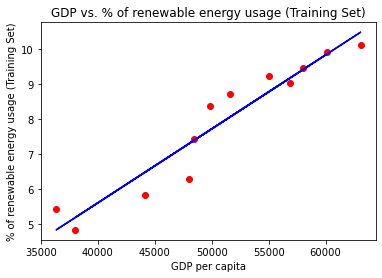

In [21]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('GDP vs. % of renewable energy usage (Training Set)')
plt.ylabel('% of renewable energy usage (Training Set)')
plt.xlabel('GDP per capita')
plt.show()
# red points - real %
# blue line - predicted %
# the regression line is calculated as close as possible to real % of renewable energy usage 

**Visualizing Test Set Results**

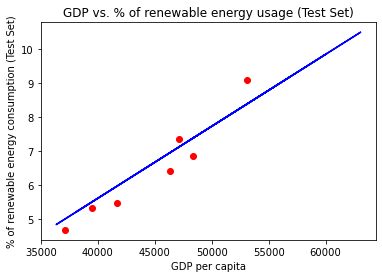

In [22]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('GDP vs. % of renewable energy usage (Test Set)')
plt.ylabel('% of renewable energy consumption (Test Set)')
plt.xlabel('GDP per capita')
plt.show()
# that's the same logic but with the test set 
# we see that the model is trained pretty good 

**Prediction of the potential % of renewable energy consumption with given GDP. The model predicts the percentage of consumpttion if the GDP equals $80000**

In [23]:
regressor.predict([[80000]])
# using the model to predict some values 

array([[14.06182444]])

In [24]:
print(regressor.coef_)
print(regressor.intercept_)

[[0.00021131]]
[-2.84272525]


Interpretation:
- if GDP equals 0, the % of renewable energy consumption ~ -4.1 (not relevant) 
- with every additional $ in GDP the increase in renewable energy is 0,021%
- .score - that's R2 -- the model explains 91% of the variation in % of renewble energy consumption. 

** the figures might be a little bit different every time we run the code as it rotates the data in the datasets. 

In [25]:
regressor.score(X, y) 

0.9231211319703139

### Get the statistical data from the dataset:

In [ ]:
for n in range(5):
    a = input("What country would you like to get the data for? ")
    subset_new = subset[(subset["Country Name"] == a)]
    subset_new.dropna(axis=0, subset=None, inplace=False)
    print(subset_new.describe())
# That's the program that allows you to get the data depending on a country
# All the principles are explained above, 
# the only difference is that I use here input command to request a country from a user 

What country would you like to get the data for? Morocco
              Year  GDP per capita (current US$) - NY.GDP.PCAP.CD  \
count    19.000000                                      19.000000   
mean   2009.000000                                    2492.999813   
std       5.627314                                     663.521495   
min    2000.000000                                    1334.943464   
25%    2004.500000                                    1985.464041   
50%    2009.000000                                    2866.924110   
75%    2013.500000                                    2974.056354   
max    2018.000000                                    3226.982794   

       Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS  \
count                                          19.000000                                     
mean                                           14.242242                                     
std                                    